In [1]:
import mtcnn
print(mtcnn.__version__)

0.1.0


In [2]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN

## loading image from file
filename = 'test1.jpg'
pixels = pyplot.imread(filename)

## detector using default weights
detector = MTCNN()

# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
    print(face)

{'box': [851, 1781, 135, 157], 'confidence': 0.9999940395355225, 'keypoints': {'left_eye': (882, 1848), 'right_eye': (944, 1835), 'nose': (916, 1878), 'mouth_left': (894, 1904), 'mouth_right': (953, 1893)}}


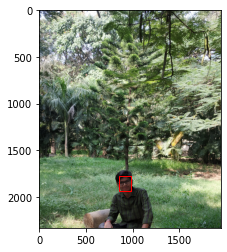

In [4]:
from matplotlib.patches import Rectangle
# draw an image with detected objects
def draw_image_with_boxes(filename,result_list):
    data = pyplot.imread(filename)
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    
    for result in result_list:
        # getting coordinates
        x,y,width,height = result['box']
        # creating the shape
        rect = Rectangle((x,y),width,height,fill=False,color='red')
        # drawing the box
        ax.add_patch(rect)
    pyplot.show()

draw_image_with_boxes(filename,faces)

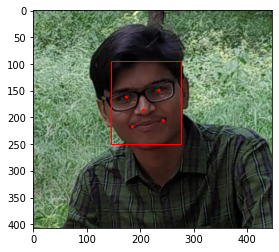

In [8]:
# we can even draw circles for eyes,nose and mouth.

from matplotlib.patches import Circle

def draw_image_with_boxes_circles(filename,result_list):
    data = pyplot.imread(filename)
    pyplot.imshow(data)
    ax = pyplot.gca()
    
    for result in result_list:
        x,y,width,height = result['box']
        rect = Rectangle((x,y),width,height,fill=False,color='red')
        ax.add_patch(rect)
        
        for key,value in result['keypoints'].items():
            dot = Circle(value,radius=2,color='red')
            ax.add_patch(dot)
    pyplot.show()
    
filename = 'test3.jpg'
pixels = pyplot.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixels)
draw_image_with_boxes_circles(filename,faces)

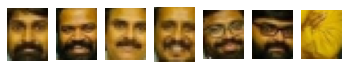

In [12]:
# draw each face separately
def draw_faces(filename,result_list):
    data = pyplot.imread(filename)
    # plot each face as a subplot
    for i in range(len(result_list)):
        x1,y1,width,height = result_list[i]['box']
        x2,y2 = x1 + width,y1 + height
        # defining subplot
        pyplot.subplot(1,len(result_list),i+1)
        pyplot.axis('off')
        pyplot.imshow(data[y1:y2,x1:x2])
    pyplot.show()
    
filename = 'test6.jpg'
pixels = pyplot.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixels)
draw_faces(filename,faces)